In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import random

# Question-1

<BarContainer object of 2 artists>

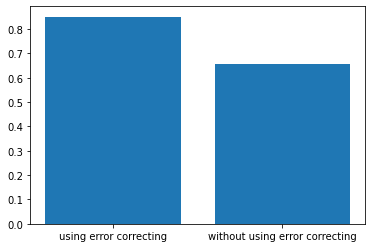

In [2]:
def bin(n,k,p):
    p =math.comb(n,k)*(p**k)*((1-p)**(n-k))
    return p
w_o= bin(4,0,0.1)
w=bin(7,0,0.1)+bin(7,1,0.1)
data={'using error correcting':w,'without using error correcting':w_o}
name=list(data.keys())
value=list(data.values())
plt.bar(name,value)


# Question-2

C:\Users\theas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


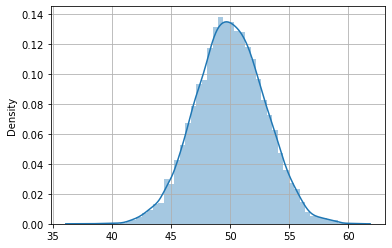

In [3]:
y=[]
for i in range(10000):
    x=np.random.uniform(0,1,100)
    y.append(np.sum(x))
    
sns.distplot(y,bins=50)
plt.grid()

# Question-3

In [4]:
def autocorrelation(x):
    N=len(x)
    r=np.zeros(N)
    
    for k in range(N):
        for i in range(N):
            if (i-k>=0):
                r[k] += ((x[i]*x[i-k]))/N
    return r

    

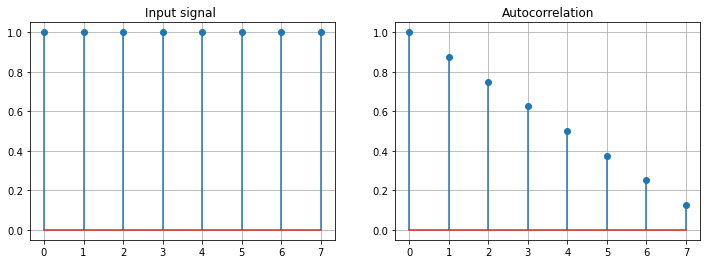

In [5]:
s=np.ones(8)
t=np.arange(0,8)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].stem(t,s)
axes[0].set_title("Input signal ")
axes[0].grid()

a=autocorrelation(s)
axes[1].stem(t,a)
axes[1].set_title("Autocorrelation")
axes[1].grid()


# Question-4

## 4.(a)

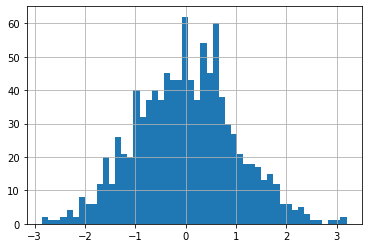

In [6]:
w_noise=np.random.normal(0,1,1000)
plt.hist(w_noise,bins=50)
plt.grid()
plt.show()

## 4.(b)

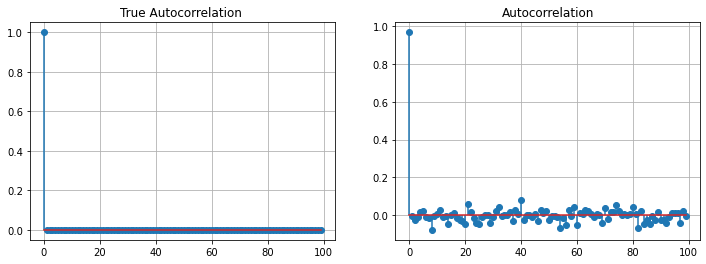

In [7]:
m=100
t = [1] + [0 for i in range(m-1)]
n = np.arange(0,100,1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].stem(n,t)
axes[0].set_title("True Autocorrelation ")
axes[0].grid()

a=autocorrelation(w_noise)[0:100]
axes[1].stem(n,a)
axes[1].set_title("Autocorrelation")
axes[1].grid()

## 4.(c)

In [8]:
N = 10
M = 100
segment = []
for i in range(N):
    segment.append(w_noise[(i*M):(i+1)*M])

In [9]:
Set = []
for i in range(N):
    n = len(segment[i])
    Set.append(autocorrelation(np.array(segment[i])))

In [10]:
out = []
K = len(Set[0])
for i in range(K):
    add = 0
    for j in range(N):
        add+=(Set[j][i])
    out.append(add/N)

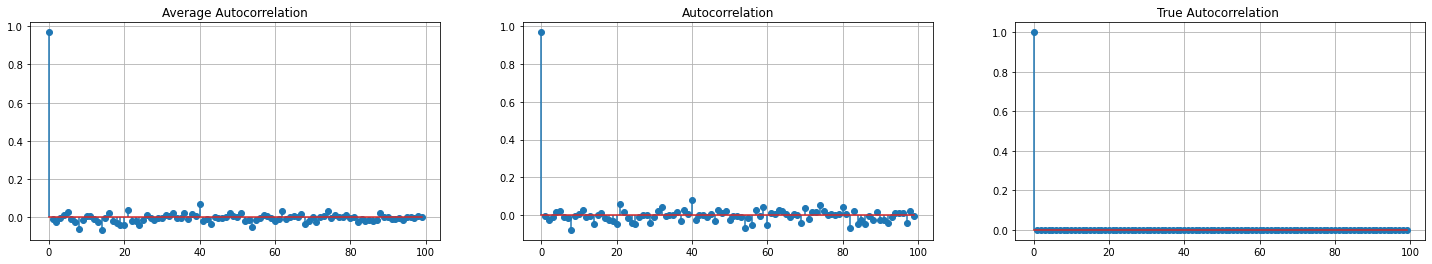

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4))

n = np.arange(0,100,1)

t = [1] + [0 for i in range(m-1)]
axes[0].stem(n,out)
axes[0].set_title("Average Autocorrelation")
axes[0].grid()

a=autocorrelation(w_noise)[0:100]
axes[1].stem(n,a)
axes[1].set_title("Autocorrelation")
axes[1].grid()

t = [1] + [0 for i in range(m-1)]
axes[2].stem(n,t)
axes[2].set_title("True Autocorrelation ")
axes[2].grid()

## 4.(d)

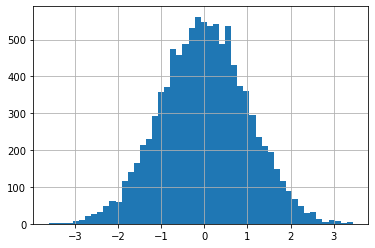

In [12]:
w_noise=np.random.normal(0,1,10000)
plt.hist(w_noise,bins=50)
plt.grid()
plt.show()

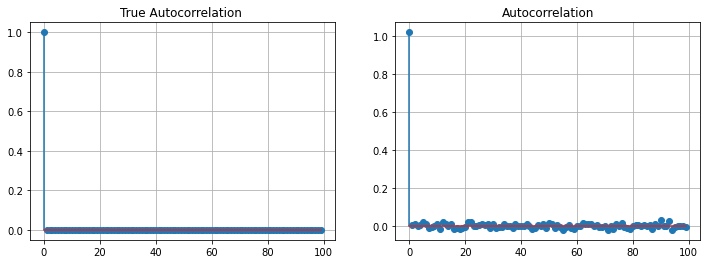

In [13]:
m=100
t = [1] + [0 for i in range(m-1)]
n = np.arange(0,100,1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].stem(n,t)
axes[0].set_title("True Autocorrelation ")
axes[0].grid()

a=autocorrelation(w_noise)[0:100]
axes[1].stem(n,a)
axes[1].set_title("Autocorrelation")
axes[1].grid()

### Conclusion:
As we increase the no. of samples in Autocorrelation function then it's output is getting closure to True Autocorrelation function.

# Question-5

In [14]:
df = pd.read_csv('Seed_Data.csv')
df = df.drop(['target'], axis=1) 
df

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [15]:
def correlation_coefficient(x,y):
    x1=[]
    y1=[]
    num=0
    den1=0
    den2=0
    mean_x=(np.sum(x))/(len(x))
    mean_y=(np.sum(y))/(len(y))
    
    for i in x:
        x1.append(i-mean_x)
    
   
    for j in y:
        y1.append(j-mean_y)
    
   
    for k in range(len(x1)):
        
        num=num+(x1[k]*y1[k])
        den1=den1+((x1[k])**2)
        den2=den2+((y1[k])**2)
    
    return num/np.sqrt(den1*den2)

In [16]:
def covariance(x,y):
    
    x1=[]
    y1=[]
    num=0
    mean_x=(np.sum(x))/(len(x))
    mean_y=(np.sum(y))/(len(y))
    
    for i in x:
        x1.append(i-mean_x)
    
   
    for j in y:
        y1.append(j-mean_y)
    
    for k in range(len(x1)):
        num=num+(x1[k]*y1[k])
        
    return num/(len(x1)-1)

In [17]:
A = df['A'].to_list()
P = df['P'].to_list()
C = df['C'].to_list()
LK = df['LK'].to_list()
WK = df['WK'].to_list()
A_Coef = df['A_Coef'].to_list()
LKG = df['LKG'].to_list()
S = [A,P,C,LK,WK,A_Coef,LKG]

In [18]:
# for A
cor_coff_A = []
cov_A = []
std_cor_coff_A = []
std_cov_A = []
for i in range(len(S)):
        cor_coff_A.append(correlation_coefficient(S[0],S[i]))
        cov_A.append(covariance(S[0],S[i]))
        std_cor_coff_A.append(np.corrcoef(S[0],S[i])[0][1])
        std_cov_A.append(np.cov(S[0],S[i])[0][1])

In [19]:
Column = ['A and A', 'A and P','A and C', 'A and LK','A and WK', 'A and A_Coef','A and LKG']
Data_A = {'Column':Column,'Correlation Coefficient':cor_coff_A,'Covariance':cov_A,
          'Std Correlation Coefficient':std_cor_coff_A,'Std Covariance':std_cov_A}
D_A = pd.DataFrame(Data_A)
D_A

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,A and A,1.000000,8.466351,1.000000,8.466351
1,A and P,0.994341,3.778443,0.994341,3.778443
2,A and C,0.608288,0.041823,0.608288,0.041823
3,A and LK,0.949985,1.224704,0.949985,1.224704
4,A and WK,0.970771,1.066911,0.970771,1.066911
5,A and A_Coef,-0.229572,-1.004356,-0.229572,-1.004356
6,A and LKG,0.863693,1.235133,0.863693,1.235133


In [20]:
# for P
cor_coff_P = []
cov_P = []
std_cor_coff_P = []
std_cov_P = []
for i in range(len(S)):
        cor_coff_P.append(correlation_coefficient(S[1],S[i]))
        cov_P.append(covariance(S[1],S[i]))
        std_cor_coff_P.append(np.corrcoef(S[1],S[i])[0][1])
        std_cov_P.append(np.cov(S[1],S[i])[0][1])

In [21]:
Column = ['P and A', 'P and P','P and C', 'P and LK','P and WK', 'P and A_Coef','P and LKG']
Data_P = {'Column':Column,'Correlation Coefficient':cor_coff_P,'Covariance':cov_P,
          'Std Correlation Coefficient':std_cor_coff_P,'Std Covariance':std_cov_P}
D_P = pd.DataFrame(Data_P)
D_P

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,P and A,0.994341,3.778443,0.994341,3.778443
1,P and P,1.000000,1.705528,1.000000,1.705528
2,P and C,0.529244,0.016332,0.529244,0.016332
3,P and LK,0.972422,0.562666,0.972422,0.562666
4,P and WK,0.944829,0.466065,0.944829,0.466065
5,P and A_Coef,-0.217340,-0.426766,-0.217340,-0.426766
6,P and LKG,0.890784,0.571753,0.890784,0.571753


In [22]:
# for C
cor_coff_C= []
cov_C = []
std_cor_coff_C = []
std_cov_C = []
for i in range(len(S)):
        cor_coff_C.append(correlation_coefficient(S[2],S[i]))
        cov_C.append(covariance(S[2],S[i]))
        std_cor_coff_C.append(np.corrcoef(S[2],S[i])[0][1])
        std_cov_C.append(np.cov(S[2],S[i])[0][1])

In [23]:
Column = ['C and A', 'C and P','C and C', 'C and LK','C and WK', 'C and A_Coef','C and LKG']
Data_C = {'Column':Column,'Correlation Coefficient':cor_coff_C,'Covariance':cov_C,
          'Std Correlation Coefficient':std_cor_coff_C,'Std Covariance':std_cov_C}
D_C = pd.DataFrame(Data_C)
D_C

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,C and A,0.608288,0.041823,0.608288,0.041823
1,C and P,0.529244,0.016332,0.529244,0.016332
2,C and C,1.000000,0.000558,1.000000,0.000558
3,C and LK,0.367915,0.003852,0.367915,0.003852
4,C and WK,0.761635,0.006798,0.761635,0.006798
5,C and A_Coef,-0.331471,-0.011777,-0.331471,-0.011777
6,C and LKG,0.226825,0.002634,0.226825,0.002634


In [24]:
# for LK
cor_coff_LK = []
cov_LK = []
std_cor_coff_LK = []
std_cov_LK = []
for i in range(len(S)):
        cor_coff_LK.append(correlation_coefficient(S[3],S[i]))
        cov_LK.append(covariance(S[3],S[i]))
        std_cor_coff_LK.append(np.corrcoef(S[3],S[i])[0][1])
        std_cov_LK.append(np.cov(S[3],S[i])[0][1])

In [25]:
Column = ['LK and A', 'LK and P','LK and C', 'LK and LK','LK and WK', 'LK and A_Coef','LK and LKG']
Data_LK = {'Column':Column,'Correlation Coefficient':cor_coff_LK,'Covariance':cov_LK,
          'Std Correlation Coefficient':std_cor_coff_LK,'Std Covariance':std_cov_LK}
D_LK = pd.DataFrame(Data_LK)
D_LK

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,LK and A,0.949985,1.224704,0.949985,1.224704
1,LK and P,0.972422,0.562666,0.972422,0.562666
2,LK and C,0.367915,0.003852,0.367915,0.003852
3,LK and LK,1.000000,0.196305,1.000000,0.196305
4,LK and WK,0.860415,0.143992,0.860415,0.143992
5,LK and A_Coef,-0.171562,-0.114290,-0.171562,-0.114290
6,LK and LKG,0.932806,0.203125,0.932806,0.203125


In [26]:
# for WK
cor_coff_WK = []
cov_WK = []
std_cor_coff_WK = []
std_cov_WK = []
for i in range(len(S)):
        cor_coff_WK.append(correlation_coefficient(S[4],S[i]))
        cov_WK.append(covariance(S[4],S[i]))
        std_cor_coff_WK.append(np.corrcoef(S[4],S[i])[0][1])
        std_cov_WK.append(np.cov(S[4],S[i])[0][1])

In [27]:
Column = ['WK and A', 'WK and P','WK and C', 'WK and LK','WK and WK', 'WK and A_Coef','WK and LKG']
Data_WK = {'Column':Column,'Correlation Coefficient':cor_coff_WK,'Covariance':cov_WK,
          'Std Correlation Coefficient':std_cor_coff_WK,'Std Covariance':std_cov_WK}
D_WK = pd.DataFrame(Data_WK)
D_WK

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,WK and A,0.970771,1.066911,0.970771,1.066911
1,WK and P,0.944829,0.466065,0.944829,0.466065
2,WK and C,0.761635,0.006798,0.761635,0.006798
3,WK and LK,0.860415,0.143992,0.860415,0.143992
4,WK and WK,1.000000,0.142668,1.000000,0.142668
5,WK and A_Coef,-0.258037,-0.146543,-0.258037,-0.146543
6,WK and LKG,0.749131,0.139068,0.749131,0.139068


In [28]:
# for A_Coef
cor_coff_A_Coef = []
cov_A_Coef = []
std_cor_coff_A_Coef = []
std_cov_A_Coef = []
for i in range(len(S)):
        cor_coff_A_Coef.append(correlation_coefficient(S[5],S[i]))
        cov_A_Coef.append(covariance(S[5],S[i]))
        std_cor_coff_A_Coef.append(np.corrcoef(S[5],S[i])[0][1])
        std_cov_A_Coef.append(np.cov(S[5],S[i])[0][1])

In [29]:
Column = ['A_Coef and A', 'A_Coef and P','A_Coef and C', 'A_Coef and LK','A_Coef and WK', 
          'A_Coef and A_Coef','A_Coef and LKG']
Data_A_Coef = {'Column':Column,'Correlation Coefficient':cor_coff_A_Coef,'Covariance':cov_A_Coef,
          'Std Correlation Coefficient':std_cor_coff_A_Coef,'Std Covariance':std_cov_A_Coef}
D_A_Coef = pd.DataFrame(Data_A_Coef)
D_A_Coef

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,A_Coef and A,-0.229572,-1.004356,-0.229572,-1.004356
1,A_Coef and P,-0.217340,-0.426766,-0.217340,-0.426766
2,A_Coef and C,-0.331471,-0.011777,-0.331471,-0.011777
3,A_Coef and LK,-0.171562,-0.114290,-0.171562,-0.114290
4,A_Coef and WK,-0.258037,-0.146543,-0.258037,-0.146543
5,A_Coef and A_Coef,1.000000,2.260684,1.000000,2.260684
6,A_Coef and LKG,-0.011079,-0.008187,-0.011079,-0.008187


In [30]:
# for LKG
cor_coff_LKG = []
cov_LKG = []
std_cor_coff_LKG = []
std_cov_LKG = []
for i in range(len(S)):
        cor_coff_LKG.append(correlation_coefficient(S[6],S[i]))
        cov_LKG.append(covariance(S[6],S[i]))
        std_cor_coff_LKG.append(np.corrcoef(S[6],S[i])[0][1])
        std_cov_LKG.append(np.cov(S[6],S[i])[0][1])

In [31]:
Column = ['LKG and A', 'LKG and P','LKG and C', 'LKG and LK','LKG and WK', 'LKG and A_Coef','LKG and LKG']
Data_LKG = {'Column':Column,'Correlation Coefficient':cor_coff_LKG,'Covariance':cov_LKG,
          'Std Correlation Coefficient':std_cor_coff_LKG,'Std Covariance':std_cov_LKG}
D_LKG = pd.DataFrame(Data_LKG)
D_LKG

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,LKG and A,0.863693,1.235133,0.863693,1.235133
1,LKG and P,0.890784,0.571753,0.890784,0.571753
2,LKG and C,0.226825,0.002634,0.226825,0.002634
3,LKG and LK,0.932806,0.203125,0.932806,0.203125
4,LKG and WK,0.749131,0.139068,0.749131,0.139068
5,LKG and A_Coef,-0.011079,-0.008187,-0.011079,-0.008187
6,LKG and LKG,1.000000,0.241553,1.000000,0.241553


# Question-6

## 6.(a)

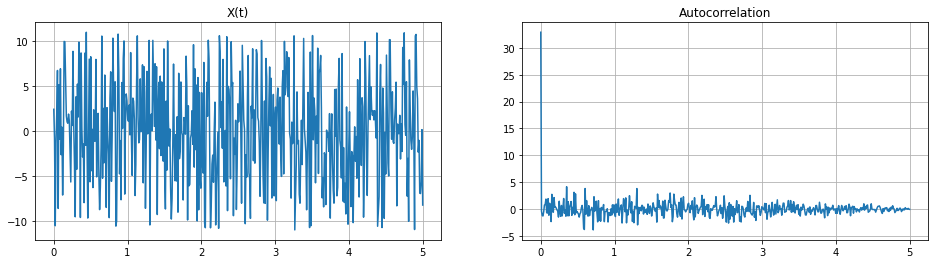

In [79]:
def x_t(t,phi1,phi2):
    return 5*np.sin(2*t+phi1) + 6*np.sin(3*t+phi2)

def autocorrelation(x):
    N=len(x)
    r=np.zeros(N)
    
    for k in range(N):
        for i in range(N):
            if (i-k>=0):
                r[k] += ((x[i]*x[i-k]))/N
    return r


t = np.linspace(0,5,500)
x = [x_t(i,np.random.uniform(-np.pi,np.pi,1),np.random.uniform(0,2*np.pi,1)) for i in t]
r = autocorrelation(x)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(t,x)
axes[0].set_title("X(t)")
axes[0].grid()

axes[1].plot(t,r)
axes[1].set_title("Autocorrelation")
axes[1].grid()

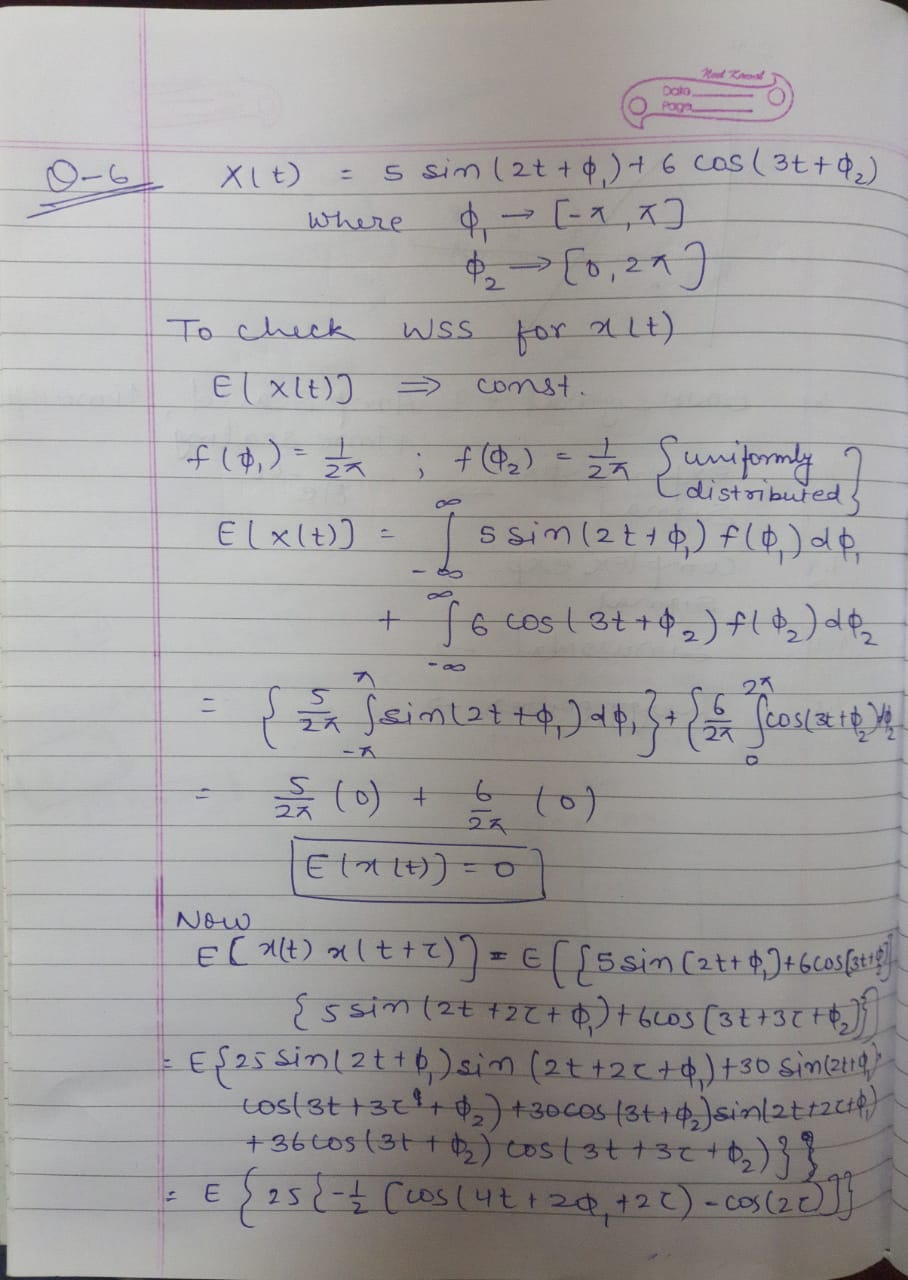

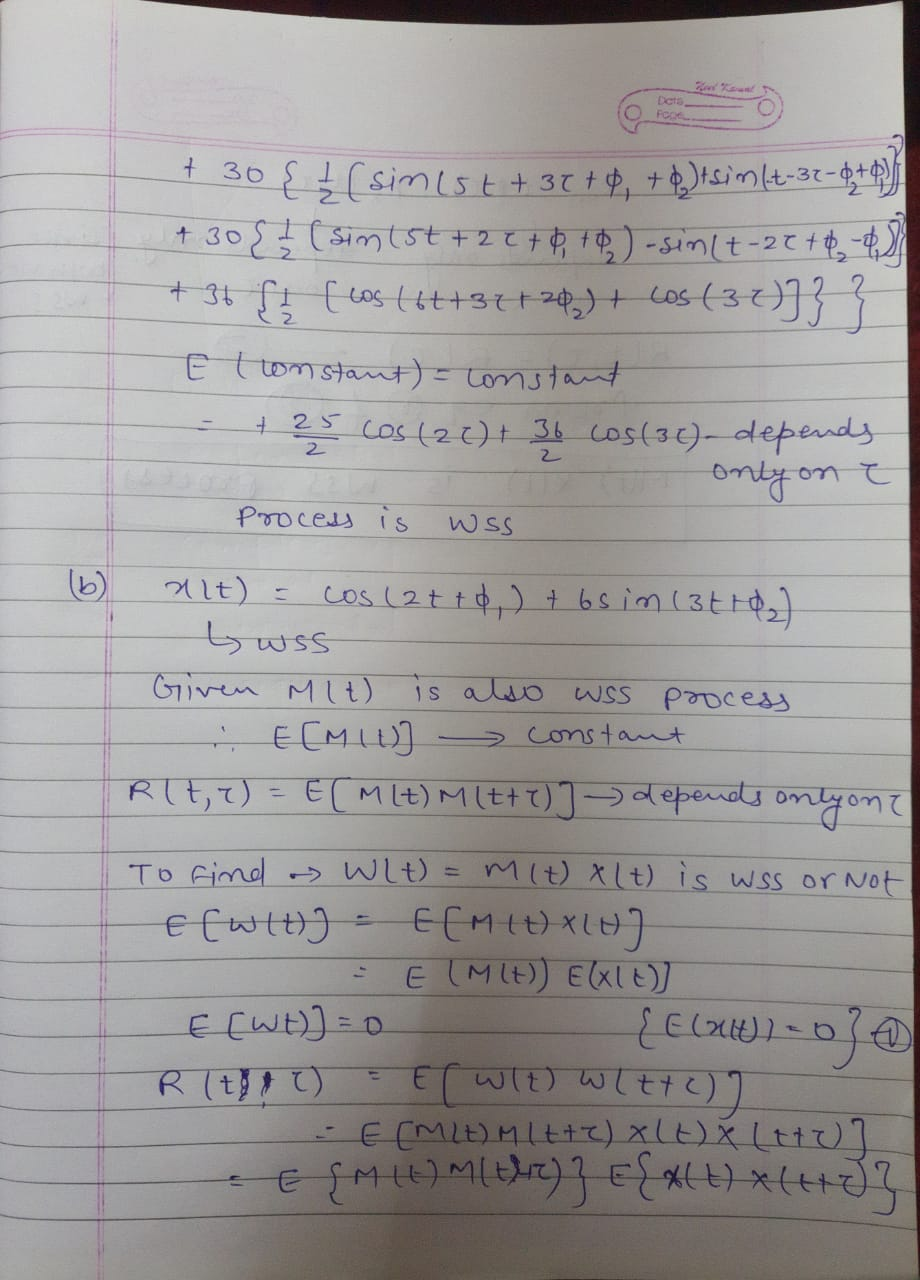

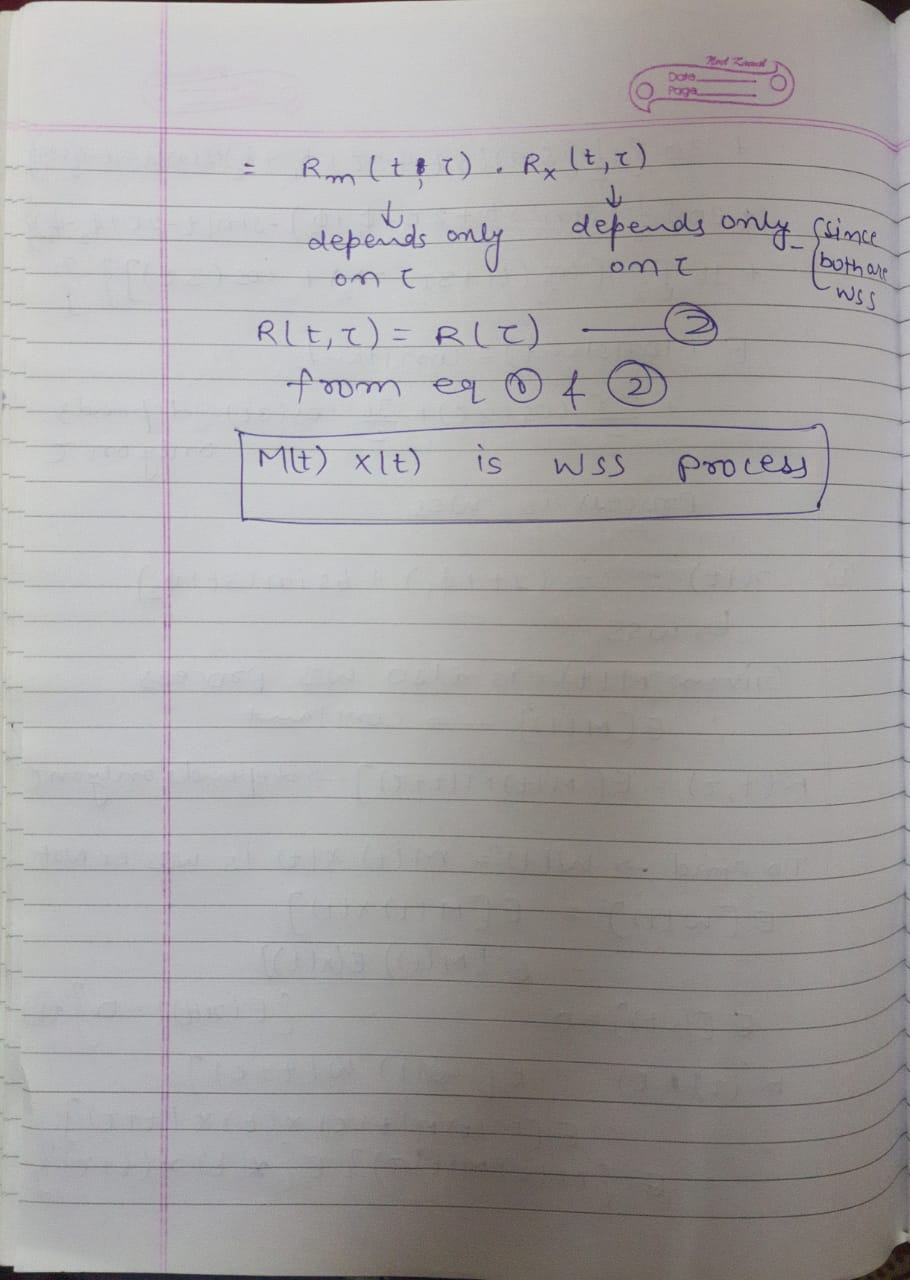

# Question-7

## 7.(a)

In [35]:
np.random.chisquare(2,size=(2,3))

array([[1.31906884, 0.87332726, 0.44048377],
       [0.25264871, 5.94380304, 0.09174531]])

## 7.(b)

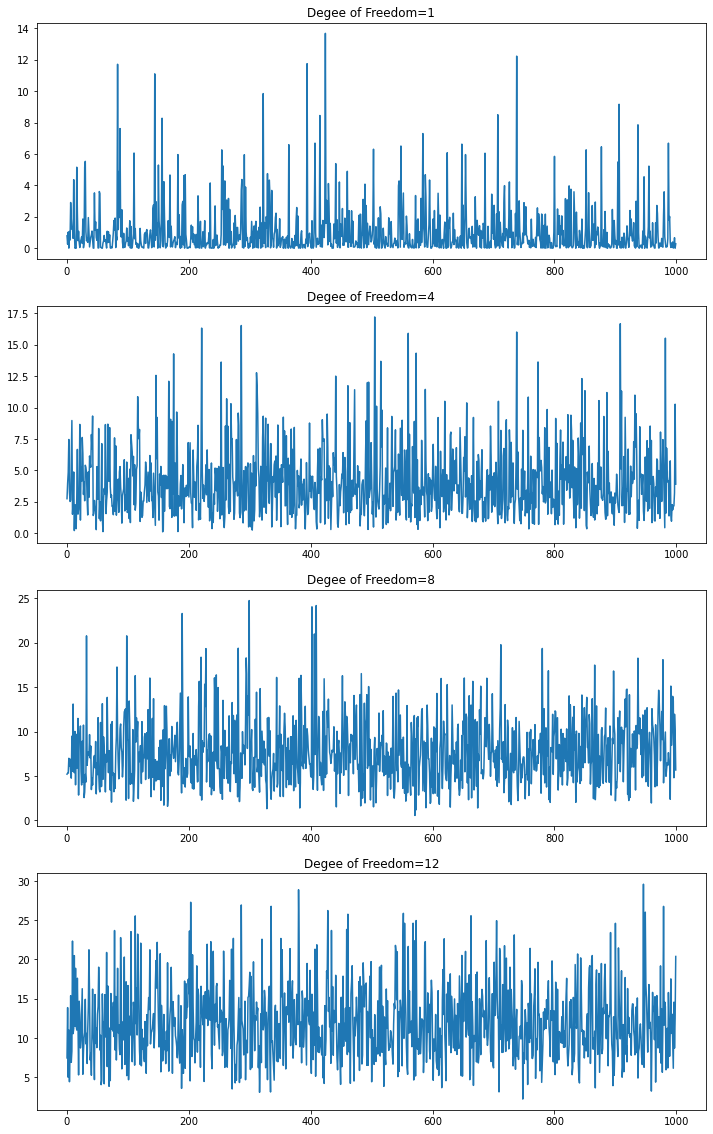

In [60]:
fig,axes = plt.subplots(4,1,figsize=(12,20))
t=np.arange(0,1000,1)
s=[1,4,8,12]
for i in range(4):
    x=np.random.chisquare(s[i],1000)
    axes[i].plot(t,x)
    axes[i].set_title(f'Degee of Freedom={s[i]}')
   

# Question-8

## 8.(a)

In [47]:
np.random.exponential(scale=2, size=(2,3))

array([[0.00986254, 1.8457202 , 1.42888538],
       [0.42545035, 3.70115988, 3.62373482]])

## 8.(b)

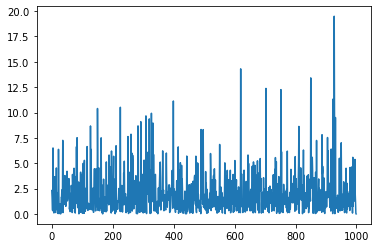

In [48]:
t=np.arange(0,1000)
x=np.random.exponential(scale=2,size= 1000)
plt.plot(t,x)

# Question-9

## 9.(a)

In [49]:
s=[2,4,6,8]
p=[.1,.3,.6,0]
np.random.choice(s,100,p=p)

array([6, 6, 6, 6, 4, 6, 4, 6, 4, 4, 4, 4, 4, 6, 6, 4, 2, 4, 6, 4, 6, 4,
       4, 4, 4, 4, 2, 2, 2, 6, 6, 4, 6, 6, 2, 6, 4, 4, 6, 2, 6, 4, 6, 2,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 6, 4, 6, 6, 4, 6,
       6, 6, 4, 2, 2, 4, 6, 6, 6, 6, 2, 6, 2, 2, 4, 6, 4, 4, 2, 4, 4, 6,
       6, 4, 4, 6, 4, 6, 2, 2, 4, 4, 6, 6])

## 9.(b)

In [50]:
np.random.choice(s,(3,5),p=p)

array([[4, 6, 2, 6, 6],
       [2, 6, 6, 6, 4],
       [6, 6, 6, 4, 6]])

# Question-10

## 10.(a)

In [51]:
def chi_square(x,k):
        f1 = math.gamma(k/2)
        f2 = 1/(((2)**(k/2))*f1)
        f3 =  ((x)*((k/2)-1))*(np.exp(-(x/2)))*f2
        return f3
    

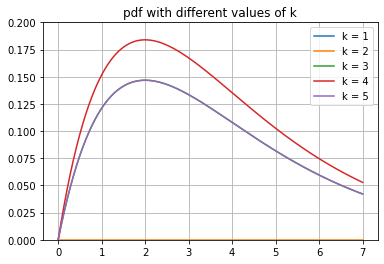

In [52]:
k = [1,2,3,4,5]
x = np.linspace(0,7,700)

plt.plot(x,chi_square(x,k = 1),label='k = 1')
plt.plot(x,chi_square(x,k = 2),label='k = 2')
plt.plot(x,chi_square(x,k = 3),label='k = 3')
plt.plot(x,chi_square(x,k = 4),label='k = 4')
plt.plot(x,chi_square(x,k = 5),label='k = 5')
plt.title('pdf with different values of k')
plt.ylim(0,0.2)
plt.legend()
plt.grid()

## 10.(b)

In [53]:
from scipy.special import iv

def non_central_chi_squared(x,k,lamda):
    f1 = 0.5*(np.exp(-0.5*(x+lamda)))
    f2 = (x/lamda)**((k/4)-0.5)
    f3 = iv((0.5*k)-1,np.sqrt(lamda*x))
    f = f1*f2*f3
    return f

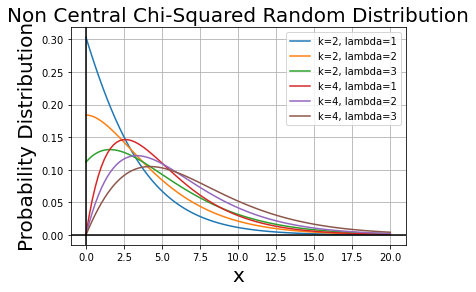

In [54]:
K = [2,4]
Lamda = [1,2,3]
L1 = ['k=2','k=4']
L2 = [', lambda=1',', lambda=2',', lambda=3']
x = np.linspace(0,20,100)
for i in range(len(K)):
    for j in range(len(Lamda)):
        plt.plot(x,non_central_chi_squared(x,K[i],Lamda[j]),label=L1[i]+L2[j])
        

plt.xlabel('x',fontsize=20)
plt.ylabel('Probability Distribution',fontsize=20)
plt.title('Non Central Chi-Squared Random Distribution',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.legend()
plt.grid()